In [3]:
#enable all magic commands
%lsmagic
#import torch
import torch
import torch.nn as nn
from torch.optim import SGD,Adam
import torch.utils.data as Data
#import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from  sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import xgboost
import xgboost as xgb
from hyperopt import fmin, tpe, hp, rand, anneal, partial, Trials
#import basics
from os import listdir   
import os 
import pandas as pd
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

In [4]:
#Generat MLP classifier
def remove_outliers(data,formula,target_property,limit,limit_pos):
    tempformula = []
    tempmiue = []
    datanew = pd.DataFrame(data=None,columns=list(data))
    data_array = np.array(data)
    data_list =data_array.tolist()
    print('Processing Outliers:')
    for i in tqdm(range(len(data))):
        #remove extreme values and repeated samples
        try:
            if data[formula][i] not in tempformula and float(data[target_property][i]) > limit[0] and float(data[target_property][i]) < limit[1]:
                tempformula.append(data[formula][i])
                #Take the median for samples with diverse structures
                data_temp = data.loc[data[formula].isin([data[formula][i]])].sort_values(by = target_property)
                data_array = np.array(data_temp)
                data_list = data_array.tolist()
                if limit_pos == 'MID':
                    datanew.loc[i] = data_list[int(len(data_list)/2)]         
                if limit_pos == 'TOP':
                    datanew.loc[i] = data_list[0]  
                if limit_pos == 'BOT':
                    datanew.loc[i] = data_list[-1]  
        except Exception as e:
            print(e)
    return(datanew)

#Unify data / oversample target data / define data loader
def log_data(data):
    logdata = []
    for i in range(len(data)):
        logdata.append(np.log10(data[i]))
    return(logdata)

def view_property_distribution(target_property_s,source_data,target_property_t,target_data):
    plt.subplot(2,1,1) 
    plt.hist(source_data[target_property_s].values.tolist(),bins=20,facecolor='royalblue')
    plt.title('Source - '+target_property_s)
    plt.subplot(2,1,2) 
    plt.hist(target_data[target_property_t].values.tolist(),bins=20,facecolor='firebrick')
    plt.title('Target - '+target_property_t, y = -0.33)
    plt.show()
    
#Generat MLP classifier
class MLPmodel_C(nn.Module):
    def __init__(self,innum,a,b,c,d,e,f,g,h,i,j,tp):
        super(MLPmodel_C,self).__init__()
        self.hidden1=nn.Sequential(
            nn.Linear(innum,a),
            nn.BatchNorm1d(num_features=a),
            nn.ReLU(),  
        )
        self.hidden2=nn.Sequential(
            nn.Linear(a,b),
            nn.BatchNorm1d(num_features=b),
            nn.ReLU(),
        )
        self.hidden3=nn.Sequential(
            nn.Linear(b,c),
            nn.BatchNorm1d(num_features=c),
            nn.ReLU(),
        )
        self.hidden4=nn.Sequential(
            nn.Linear(c,d),
            nn.BatchNorm1d(num_features=d),
            nn.ReLU(),
        )
        self.hidden5=nn.Sequential(
            nn.Linear(d,e),
            nn.BatchNorm1d(num_features=e),
            nn.ReLU(),
        )
        self.hidden6=nn.Sequential(
            nn.Linear(e,f),
            nn.BatchNorm1d(num_features=f),
            nn.ReLU(),
        )
        self.hidden7=nn.Sequential(
            nn.Linear(f,g),
            nn.BatchNorm1d(num_features=g),
            nn.ReLU(),
        )
        self.hidden8=nn.Sequential(
            nn.Linear(g,h),
            nn.BatchNorm1d(num_features=h),
            nn.ReLU(),
        )
        self.hidden9=nn.Sequential(
            nn.Linear(h,i),
            nn.BatchNorm1d(num_features=i),
            nn.ReLU(),
        )
        self.hidden10=nn.Sequential(
            nn.Linear(i,j),
            nn.BatchNorm1d(num_features=j),
            nn.ReLU(),
        )
        self.classifier=nn.Sequential(
            nn.Linear(j,1),
            nn.Sigmoid(),
        )
    def forward(self,x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.hidden4(x)
        x = self.hidden5(x)
        x = self.hidden6(x)
        x = self.hidden7(x)
        x = self.hidden8(x)
        x = self.hidden9(x)
        x = self.hidden10(x)
        output = self.classifier(x)
        return output


class MLPmodel(nn.Module):
    def __init__(self,a,b,c,d,e,f,g,h,i,j,tp):
        super(MLPmodel,self).__init__()
        self.hidden1=nn.Sequential(
            nn.Linear(268,a),
            nn.BatchNorm1d(num_features=a),
            nn.ReLU(), 
        )
        self.hidden2=nn.Sequential(
            nn.Linear(a,b),
            nn.BatchNorm1d(num_features=b),
            nn.ReLU(),
        )
        self.hidden3=nn.Sequential(
            nn.Linear(b,c),
            nn.BatchNorm1d(num_features=c),
            nn.ReLU(),
        )
        self.hidden4=nn.Sequential(
            nn.Linear(c,d),
            nn.BatchNorm1d(num_features=d),
            nn.ReLU(),
        )
        self.hidden5=nn.Sequential(
            nn.Linear(d,e),
            nn.BatchNorm1d(num_features=e),
            nn.ReLU(),
        )
        self.hidden6=nn.Sequential(
            nn.Linear(e,f),
            nn.BatchNorm1d(num_features=f),
            nn.ReLU(),
        )
        self.hidden7=nn.Sequential(
            nn.Linear(f,g),
            nn.BatchNorm1d(num_features=g),
            nn.ReLU(),
        )
        self.hidden8=nn.Sequential(
            nn.Linear(g,h),
            nn.BatchNorm1d(num_features=h),
            nn.ReLU(),
        )
        self.hidden9=nn.Sequential(
            nn.Linear(h,i),
            nn.BatchNorm1d(num_features=i),
            nn.ReLU(),
        )
        self.hidden10=nn.Sequential(
            nn.Linear(i,j),
            nn.BatchNorm1d(num_features=j),
            nn.ReLU(),
        )
        if tp == 'r':
            self.regression=nn.Sequential(
                nn.Linear(j,1),
                nn.ReLU(),
            )
        if tp == 'c':
            self.regression=nn.Sequential(
                nn.Linear(j,1),
                nn.Sigmoid(),
            )
    def forward(self,x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.hidden4(x)
        x = self.hidden5(x)
        x = self.hidden6(x)
        x = self.hidden7(x)
        x = self.hidden8(x)
        x = self.hidden9(x)
        x = self.hidden10(x)
        output = self.regression(x)
        return output
    
#Load and unify train data
def cbfv_tolist(data):
    cbfvlist = []
    for j in range(len(data)):
        temp = np.array(data[j].strip('[').strip(']').split(','))
        fv = []
        for i in range(len(temp)):
            try:
                fv.append(float(temp[i]))
            except:
                if temp[i] == ' False':
                    fv.append(0)
                elif temp[i]:
                    fv.append(1)
        cbfvlist.append(fv)
    return(cbfvlist)

def data_unifier(data):
    ss = StandardScaler(with_mean = True,with_std = True)
    new_data = ss.fit_transform(data)
    return(new_data)

def oversample(dataX,dataY,target_size):
    print('Oversampling, target_size: ',target_size)
    dataXnew = []
    dataYnew = []
    for i in range(len(dataX)):
        dataXnew.append(dataX[i])
        dataYnew.append(dataY[i])
    for i in tqdm(range(target_size-len(dataX))):
        rand = random.randint(0,len(dataX)-1)
        dataXnew.append(dataX[rand])
        dataYnew.append(dataY[rand])
    return(dataXnew,dataYnew)

def batch_loader(dataX,dataY,batchsize):
    minvalue = min(dataY)
    print(minvalue)
    for i in range(len(dataY)):
        dataY[i] -= minvalue
    trainX, testX, trainY, testY = train_test_split(dataX, dataY, train_size = 0.85, test_size = 0.15, random_state = 42)
    trainX_tensor = torch.from_numpy(np.array(trainX).astype(np.float32))
    trainY_tensor = torch.from_numpy(np.array(trainY).astype(np.float32))
    train_data = Data.TensorDataset(trainX_tensor,trainY_tensor)
    train_loader = Data.DataLoader(
        dataset = train_data,
        batch_size = batchsize,
        shuffle = True,
        num_workers = 0,
    )
    for step,(b_x,b_y) in enumerate(train_loader):
        if step>0:
            break
    print("Check:")
    print("batch_x.shape:",b_x.shape)
    print("batch_y.shape:",b_y.shape)
    print("batch_x.dtype:",b_x.dtype)
    print("batch_y.dtype:",b_y.dtype)
    return(train_loader, trainX, testX, trainY, testY)

#Train MLP
def train_mlp(mlp,train_loader,iteration,learning_rate,modeltype,viewloss):
    optimizer=Adam(mlp.parameters(),
                    lr=learning_rate,
                    betas=(0.9, 0.999),
                    eps=1e-08,
                    weight_decay=0,
                    amsgrad=False)
    if modeltype == 'r':
        loss_func=nn.MSELoss()
    if modeltype == 'c':
        loss_func=nn.BCELoss(reduction='mean')
    train_loss_all=[]
    for epoch in range(iteration):
        for step,(b_x,b_y) in enumerate(train_loader):
            output=mlp(b_x).flatten()
            train_loss=loss_func(output,b_y)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        train_loss_all.append(train_loss.item())
        print(epoch,train_loss.item())
        if train_loss.item() < 0.0001:
            break
    if viewloss == 1:
        plt.figure()
        plt.plot(train_loss_all,"b-")
        plt.title("train loss per Ite")
        plt.show()
    if train_loss_all[0] / train_loss_all[-1]+0.000001 < 1.3:
        state = 0
    else:
        state = 1
    return(state)

#Train joint MLP

def joint_train_mlp(mlp,train_loader_s,mlp_c,iteration):
    optimizer=Adam(mlp.parameters(),
                    lr=0.00005,
                    betas=(0.9, 0.999),
                    eps=1e-08,
                    weight_decay=0,
                    amsgrad=False)
    loss_func=nn.MSELoss()
    loss_funcc=nn.BCELoss(reduction='mean')
    train_loss_all=[]
    train_loss_all_2=[]
    for epoch in range(iteration):
        for step,(b_x,b_y) in enumerate(train_loader_s):
            output=mlp(b_x).flatten()
            outputc=mlp_c(mlp.hidden10(mlp.hidden9(mlp.hidden8(mlp.hidden7(mlp.hidden6(mlp.hidden5(mlp.hidden4(mlp.hidden3(mlp.hidden2(mlp.hidden1(torch.cat([b_x, torch.from_numpy(np.array(dataX_adversarial[:1500]).astype(np.float32))], 0)))))))))))).flatten()
            train_loss1=loss_func(output,b_y)
            temp_y=np.concatenate((np.array(np.zeros((len(outputc)-1500), dtype=int)), np.array(np.ones((1500), dtype=int))), axis=0)
            train_loss2=loss_funcc(outputc,torch.from_numpy(temp_y.astype(np.float32)))
            train_loss=train_loss1-train_loss2+1
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        train_loss_all.append(train_loss.item())
        train_loss_all_2.append(train_loss2.item())
        #print(epoch,train_loss.item())
        #print(epoch,train_loss2.item())
        if train_loss.item() < 0.0001:
            break
    plt.subplot(2,1,1) 
    plt.plot(train_loss_all,"r-",label='Source')
    plt.title('Total loss')
    plt.subplot(2,1,2) 
    plt.plot(train_loss_all_2,"b-",label='Classifier')
    plt.title('Classifier loss',y = -0.33)
    plt.show()
    return(train_loss_all[-1])

#Initialize MLP model
def initialize_mlp(neuron_number_layers,train_loader,learning_rate,tp):
    mlp = MLPmodel(neuron_number_layers[0],neuron_number_layers[1],neuron_number_layers[2],neuron_number_layers[3],neuron_number_layers[4],neuron_number_layers[5],neuron_number_layers[6],neuron_number_layers[7],neuron_number_layers[8],neuron_number_layers[9],tp)
    print(mlp)
    state = train_mlp(mlp,train_loader,50,learning_rate,'r',1)
    for i in range(3):
        if state == 1:
            break
        if state == 0:
            mlp = MLPmodel(neuron_number_layers[0],neuron_number_layers[1],neuron_number_layers[2],neuron_number_layers[3],neuron_number_layers[4],neuron_number_layers[5],neuron_number_layers[6],neuron_number_layers[7],neuron_number_layers[8],neuron_number_layers[9],tp)
            state = train_mlp(mlp,train_loader, 50,learning_rate,'r',1)
    if state == 1:
        print('initialize succeed, continue')
    if state == 0:
        print('Initialize failed')
    model_save_path = '/home/xychen/Carrior Mobility/MLP_MODELS_8/model_initialized_fn'+str(neuron_number_layers[0])+'_'+str(neuron_number_layers[1])+'_'+str(neuron_number_layers[2])+'_'+str(neuron_number_layers[3])+'_'+str(neuron_number_layers[4])+'_'+str(neuron_number_layers[5])+'_'+str(neuron_number_layers[6])+'_'+str(neuron_number_layers[7])+'_'+str(neuron_number_layers[8])+'_'+str(neuron_number_layers[9])+'.pt'
    torch.save(mlp, model_save_path)
    return(model_save_path)

def initialize_mlp_C(innum,neuron_number_layers,train_loader,learning_rate,tp):
    mlp = MLPmodel_C(innum,3+int(neuron_number_layers[0]/268*innum),3+int(neuron_number_layers[1]/268*innum),3+int(neuron_number_layers[2]/268*innum),3+int(neuron_number_layers[3]/268*innum),3+int(neuron_number_layers[4]/268*innum),3+int(neuron_number_layers[5]/268*innum),3+int(neuron_number_layers[6]/268*innum),3+int(neuron_number_layers[7]/268*innum),3+int(neuron_number_layers[8]/268*innum),3+int(neuron_number_layers[9]/268*innum),tp)
    print(mlp)
    state = train_mlp(mlp,train_loader,75,learning_rate,'c',1)
    for i in range(2):
        if state == 1:
            break
        if state == 0:
            mlp = MLPmodel_C(innum,3+int(neuron_number_layers[0]/268*innum),3+int(neuron_number_layers[1]/268*innum),3+int(neuron_number_layers[2]/268*innum),3+int(neuron_number_layers[3]/268*innum),3+int(neuron_number_layers[4]/268*innum),3+int(neuron_number_layers[5]/268*innum),3+int(neuron_number_layers[6]/268*innum),3+int(neuron_number_layers[7]/268*innum),3+int(neuron_number_layers[8]/268*innum),3+int(neuron_number_layers[9]/268*innum),tp)
            state = train_mlp(mlp,train_loader, 75,learning_rate,'c',1)
    if state == 1:
        print('initialize succeed, continue')
    if state == 0:
        print('Initialize failed')
    model_save_path = '/home/xychen/Carrior Mobility/MLP_MODELS_8/model_initialized_c_fn'+str(neuron_number_layers[0])+'_'+str(neuron_number_layers[1])+'_'+str(neuron_number_layers[2])+'_'+str(neuron_number_layers[3])+'_'+str(neuron_number_layers[4])+'_'+str(neuron_number_layers[5])+'_'+str(neuron_number_layers[6])+'_'+str(neuron_number_layers[7])+'_'+str(neuron_number_layers[8])+'_'+str(neuron_number_layers[9])+'.pt'
    torch.save(mlp, model_save_path)
    return(model_save_path)

def exclude_zeros(fv):
    newfv = []
    exclude = []
    arrfv = np.array(fv)
    for i in range(len(arrfv.T)):
        if sum(arrfv.T[i].tolist()) == 0:
            exclude.append(i)
    for i in range(len(fv)):
        temp = []
        for j in range(len(fv[i])):
            if j not in exclude:
                temp.append(fv[i][j])
        newfv.append(temp)
    return(newfv)

#evaluate model accuracy
def view_model_accuracy(trainX,trainY,testX,testY,Ymin):
    plt.figure(figsize=(6,6))
    left = min([min(trainX),min(trainY),min(testX),min(testY)])-Ymin-1
    right = max([max(trainX),max(trainY),max(testX),max(testY)])-Ymin+1
    x1 = np.linspace(left,right,500)
    y1 = x1
    plt.plot(x1,y1,color = 'black',linewidth = 1,dashes=[6, 2])
    plt.ylabel('Predict Value',fontsize=25)
    plt.xlabel('True Value',fontsize=25)
    print('R2_training: ',r2_score(np.array(trainY)-Ymin,trainX-Ymin))
    print('RMSE_training:',mean_squared_error(np.array(trainY)-Ymin,trainX-Ymin)**(1/2))
    print('R2_testing: ',r2_score(np.array(testY)-Ymin,testX-Ymin))
    print('RMSE_testing:',mean_squared_error(np.array(testY)-Ymin,testX-Ymin)**(1/2))
    plt.scatter(np.array(trainY)-Ymin, trainX-Ymin, c = 'royalblue',alpha = 0.4,label = 'training')
    plt.scatter(np.array(testY)-Ymin, testX-Ymin, c = 'salmon',alpha = 0.4,label = 'testing')
    plt.legend(fontsize=20)
    plt.show()
    return(r2_score(np.array(trainY)-Ymin,trainX-Ymin),r2_score(np.array(testY)-Ymin,testX-Ymin))


def model_training_with_kfold_cv(X,Y,k,ite,rs):
    def function(argsDict):
        colsample_bytree = argsDict["colsample_bytree"]
        max_depth = argsDict["max_depth"]
        n_estimators = argsDict['n_estimators']
        learning_rate = argsDict["learning_rate"]
        subsample = argsDict["subsample"]
        min_child_weight = argsDict["min_child_weight"]
        gamma = argsDict["gamma"]
        model = xgb.XGBRegressor(nthread=4,    
                                colsample_bytree=colsample_bytree,
                                max_depth=int(max_depth),  
                                n_estimators=int(n_estimators),   
                                learning_rate=learning_rate, 
                                subsample=subsample,      
                                min_child_weight=min_child_weight,  
                                gamma=gamma,
                                random_state=int(42),
                                objective="reg:squarederror"
                                )
        model.fit(trainX, trainY)
        prediction = model.predict(testX)
        #R2 = r2_score(testY, prediction)
        RMSE = mean_squared_error(testY, prediction)**(1/2)
        return RMSE
    best_models = []
    feature_importance = []
    overfitting = []
    testings = []
    predictions = []
    index = []
    kf = KFold(n_splits=k,shuffle=True,random_state=rs)#k-fold cross validation
    count = 0
    for train_index,test_index in kf.split(X,Y):
        count += 1
        trainX,testX,trainY,testY = [],[],[],[]
        for i in range(len(Y)):
            if i in train_index:
                trainX.append(X[i])
                trainY.append(Y[i])
            else:
                testX.append(X[i])
                testY.append(Y[i])
        print(len(trainX),len(testX))
        print(count)
        trainX = np.array(trainX)
        testX = np.array(testX)
        trials = Trials()
        best = fmin(function, parameter_space_gbr, algo=tpe.suggest, max_evals=ite, trials=trials)
        parameters = ['colsample_bytree', 'max_depth', 'n_estimators', 'learning_rate', 'gamma', 'min_child_weight']
        colsample_bytree = best["colsample_bytree"]
        max_depth = best["max_depth"]
        n_estimators = best['n_estimators']
        learning_rate = best["learning_rate"]
        subsample = best["subsample"]
        min_child_weight = best["min_child_weight"]
        gamma = best["gamma"]
        print("The_best_parameter：", best)
        best_models.append(best)
        gbr = xgb.XGBRegressor(nthread=4,   
                                    colsample_bytree=colsample_bytree,
                                    max_depth=int(max_depth),  
                                    n_estimators=int(n_estimators),   
                                    learning_rate=learning_rate, 
                                    subsample=subsample,      
                                    min_child_weight=min_child_weight,   
                                    gamma=gamma,
                                    random_state=int(42),
                                    objective="reg:squarederror"
                                    )
        gbr.fit(trainX, trainY)
        feature_importance.append(gbr.feature_importances_)
        predictY_test = gbr.predict(testX)
        predictY_train = gbr.predict(trainX)
        testings.extend(testY)
        predictions.extend(predictY_test)
        index.extend(test_index)
        print('RMSE_testing:',mean_squared_error(testY, predictY_test)**(1/2))
        print('r2_testing:',r2_score(testY, predictY_test))
        print('RMSE_training:',mean_squared_error(trainY, predictY_train)**(1/2))
        print('r2_training:',r2_score(trainY, predictY_train))
        overfitting.append(mean_squared_error(trainY, predictY_train)**(1/2)-mean_squared_error(testY, predictY_test)**(1/2))
    index_sorted,testings_sorted,predictions_sorted = (list(t) for t in zip(*sorted(zip(index,testings,predictions))))
    return(best_models,testings_sorted,predictions_sorted,feature_importance,np.mean(overfitting))


def view_accuracy(testings, predictions):
    print("RMSE:",mean_squared_error(testings, predictions)**(1/2))
    print("R2:",r2_score(testings, predictions))
    plt.figure(figsize=(6,6))
    plt.ylabel('Predict Bandgap (eV)',fontsize=25)
    plt.xlabel('HSE Bandgap (eV)',fontsize=25)
    x1 = np.linspace(min([min(testings),min(predictions)])-1,max([max(testings),max(predictions)])+1,500)#从(-1,1)均匀取50个点
    y1 = x1
    plt.plot(x1,y1,color = 'black',linewidth = 1,dashes=[6, 2])
    plt.scatter(testings, predictions, c = 'salmon',alpha=0.8,label='10-fold_cross_validation')
    plt.legend(fontsize=15)
    plt.show()
    
###plot scatter of testing value and prediction value after random cv
def view_accuracy_random_cv(testings, predictions_randcv):
    meanprediction = []
    stdprediction = []
    RMSE = []
    R2 = []
    for i in range(len(predictions_randcv)):
        RMSE.append(mean_squared_error(testings, predictions_randcv[i])**(1/2))
        R2.append(r2_score(testings, predictions_randcv[i]))
    for i in range(len(testings)):
        temp = []
        for j in range(len(predictions_randcv)):
            temp.append(predictions_randcv[j][i])
        meanprediction.append(np.mean(temp))
        stdprediction.append(np.std(temp))
    print("RMSE_mean:",mean_squared_error(testings, meanprediction)**(1/2))
    print("R2_mean:",r2_score(testings, meanprediction))
    print("mean_RMSE:",np.mean(RMSE))
    print("mean_R2:",np.mean(R2))
    print("std_RMSE:",np.std(RMSE))
    print("std_R2:",np.std(R2))#show RMSE R2 and their standard error
    plt.figure(figsize=(6,6))
    plt.ylabel('Predict Bandgap (eV)',fontsize=25)
    plt.xlabel('HSE Bandgap (eV)',fontsize=25)
    x1 = np.linspace(min(testings)-1,max(testings)+1,500)
    y1 = x1
    plt.plot(x1,y1,color = 'black',linewidth = 1,dashes=[6, 2])
    plt.errorbar(testings, meanprediction,yerr = stdprediction,elinewidth=0.2,alpha=0.7,ecolor = 'firebrick',capsize=3,capthick=0.5,linestyle="none")
    plt.scatter(testings, meanprediction, c = 'salmon',alpha=0.6,label='10-fold_cross_validation')
    plt.legend(fontsize=20)
    plt.show()
    return(np.mean(R2),np.mean(RMSE))

In [6]:
%time
#Source-bulk
path_csv_source = '../property_feature_source_U.csv'
data_source = pd.read_csv(path_csv_source)
data_source_clean = remove_outliers(data_source,'Formula','Mass_eff_Electron',[1e-7,1e3],'TOP')
print('Property list:',list(data_source))
print('Sample size:',len(data_source))
print('Cleaned Sample size:',len(data_source_clean))
#Adversarial-2D
path_csv_adversarial = '../property_feature_adversarial_U.csv'
data_adversarial = pd.read_csv(path_csv_adversarial)
data_adversarial_clean = remove_outliers(data_adversarial,'formula','gap',[0,10],'BOT')
print('Property list:',list(data_adversarial))
print('Sample size:',len(data_adversarial))
print('Cleaned Sample size:',len(data_adversarial_clean))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
Processing Outliers:


100%|████████████████████████████████████████████████████████████████████████████| 22976/22976 [01:07<00:00, 340.18it/s]


Property list: ['Unnamed: 0', 'MPid', 'Formula', 'Gap', 'Mass_eff_Electron', 'Mass_eff_Hole', 'indicator', 'feature']
Sample size: 22976
Cleaned Sample size: 16569
Processing Outliers:


  1%|▊                                                                               | 39/4035 [00:00<00:10, 373.72it/s]

could not convert string to float: "<class 'float'>"


100%|██████████████████████████████████████████████████████████████████████████████| 4035/4035 [00:10<00:00, 392.47it/s]

Property list: ['Unnamed: 0', 'ID', 'formula', 'cod_id', 'spacegroup', 'spacegroup_num', 'pointgroup', 'has_inversion_symmetry', 'hform', 'ehull', 'thermodynamic_stability_level', 'gap', 'gap_dir', 'gap_nosoc', 'gap_dir_nosoc', 'cbm', 'cbm_dir', 'vbm', 'vbm_dir', 'efermi', 'dipz', 'evac', 'evacdiff', 'workfunction', 'gap_dir_hse', 'gap_dir_hse_nosoc', 'gap_hse', 'gap_hse_nosoc', 'cbm_hse', 'cbm_hse_nosoc', 'vbm_hse', 'vbm_hse_nosoc', 'efermi_hse_nosoc', 'efermi_hse_soc', 'emass_cb_dir1', 'emass_cb_dir2', 'emass_cb_dir3', 'emass_vb_dir1', 'emass_vb_dir2', 'emass_vb_dir3', 'is_magnetic', 'bader_charges', 'magmoms', 'filename', 'feature']
Sample size: 4035
Cleaned Sample size: 1216


In [11]:
X = data_source_clean['feature'].values.tolist()
Y = log_data(data_source_clean['Mass_eff_Electron'].values.tolist())
XS,YS = [],[]
for i in range(len(X)):
    if X[i] != '0':        
        XS.append(X[i])
        YS.append(Y[i])

In [13]:
XA = cbfv_tolist(data_adversarial_clean['feature'].values.tolist())
YA = data_adversarial_clean['gap'].values.tolist()
for i in range(len(XA)):
    for j in range(len(XA[i])):
        if np.isnan(XA[i][j]) == 1:
            XA[i][j] = 0

In [15]:
dataX_source = data_unifier(cbfv_tolist(XS))
whereisnan=np.isnan(dataX_source)
print(dataX_source[whereisnan])
dataX_source[whereisnan]=0
dataY_source = YS
train_loader_s, trainX_s, testX_s, trainY_s, testY_s = batch_loader(dataX_source,dataY_source,1500)
dataX_adversarial,dataY_adversarial = oversample(XA,YA,len(dataX_source))
#whereisnan=np.isnan(dataX_adversarial)
#print(dataX_adversarial[whereisnan])
#dataX_adversarial[whereisnan]=0
for i in range(len(dataY_adversarial)):
    dataY_adversarial[i] = float(dataY_adversarial[i])
train_loader_a, trainX_a, testX_a, trainY_a, testY_a = batch_loader(dataX_adversarial,dataY_adversarial,1500)
#check data size
print(len(dataX_source),len(dataX_adversarial),len(dataY_source),len(dataY_adversarial))

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
-2.756000967154827
Check:
batch_x.shape: torch.Size([1500, 268])
batch_y.shape: torch.Size([1500])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
Oversampling, target_size:  9058


100%|███████████████████████████████████████████████████████████████████████████| 7842/7842 [00:00<00:00, 669824.50it/s]

0.000298818
Check:
batch_x.shape: torch.Size([1500, 268])
batch_y.shape: torch.Size([1500])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
9058 9058 9058 9058


MLPmodel(
  (hidden1): Sequential(
    (0): Linear(in_features=268, out_features=224, bias=True)
    (1): BatchNorm1d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hidden2): Sequential(
    (0): Linear(in_features=224, out_features=224, bias=True)
    (1): BatchNorm1d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hidden3): Sequential(
    (0): Linear(in_features=224, out_features=170, bias=True)
    (1): BatchNorm1d(170, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hidden4): Sequential(
    (0): Linear(in_features=170, out_features=170, bias=True)
    (1): BatchNorm1d(170, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hidden5): Sequential(
    (0): Linear(in_features=170, out_features=104, bias=True)
    (1): BatchNorm1d(104, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hi

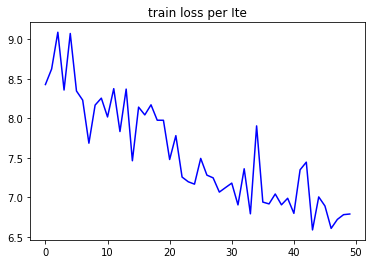

0 7.5780463218688965
1 6.826103687286377
2 6.937314510345459
3 6.869868278503418
4 6.681015491485596
5 6.521377086639404
6 7.010834217071533
7 7.058687686920166
8 6.026464939117432
9 6.606300354003906
10 6.556195259094238
11 6.183664798736572
12 6.452711582183838
13 5.965156078338623
14 6.016452312469482
15 6.194040775299072
16 6.304067134857178
17 6.385668754577637
18 5.554215908050537
19 6.7512102127075195
20 6.0876078605651855
21 6.012824058532715
22 5.962427616119385
23 6.074156284332275
24 5.355072975158691
25 5.688916206359863
26 5.805425643920898
27 5.622548580169678
28 5.5276923179626465
29 5.552218914031982
30 5.558581352233887
31 5.5588226318359375
32 5.383968353271484
33 5.993038177490234
34 5.467859745025635
35 5.335869312286377
36 5.4033637046813965
37 5.156067848205566
38 5.648768901824951
39 5.145533084869385
40 5.097278118133545
41 5.622619152069092
42 5.415855407714844
43 5.521551132202148
44 5.396922588348389
45 5.546070575714111
46 5.27329158782959
47 5.4226760864257

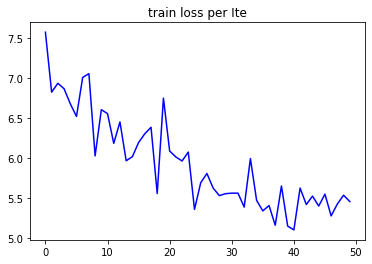

initialize succeed, continue
/home/xychen/Carrior Mobility/MLP_MODELS_8/model_initialized_fn224_224_170_170_104_104_46_46_15_15.pt 7699 1359
0
Check:
batch_x.shape: torch.Size([3000, 15])
batch_y.shape: torch.Size([3000])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
MLPmodel_C(
  (hidden1): Sequential(
    (0): Linear(in_features=15, out_features=15, bias=True)
    (1): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hidden2): Sequential(
    (0): Linear(in_features=15, out_features=15, bias=True)
    (1): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hidden3): Sequential(
    (0): Linear(in_features=15, out_features=12, bias=True)
    (1): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (hidden4): Sequential(
    (0): Linear(in_features=12, out_features=12, bias=True)
    (1): BatchNorm1d(12, eps=1e-05, momen

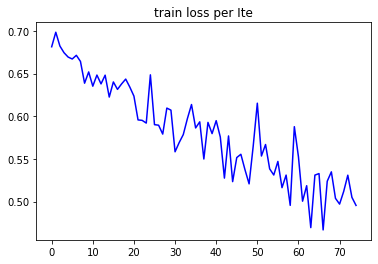

initialize succeed, continue


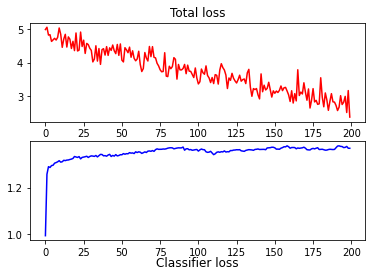

0
Check:
batch_x.shape: torch.Size([1500, 15])
batch_y.shape: torch.Size([1500])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
0 0.6655378341674805
1 0.654809832572937
2 0.6295905709266663
3 0.7286416292190552
4 0.6355848908424377
5 0.6269857883453369
6 0.6247044205665588
7 0.6578533053398132
8 0.6445264220237732
9 0.5816559791564941
10 0.6457010507583618
11 0.5969604849815369
12 0.6083975434303284
13 0.586587131023407
14 0.5793898105621338
15 0.6059237122535706
16 0.575998067855835
17 0.6156097650527954
18 0.566434919834137
19 0.5795674324035645
20 0.5583181381225586
21 0.5662895441055298
22 0.5640954971313477
23 0.5190559029579163
24 0.5439781546592712
25 0.6039028763771057
26 0.582936704158783
27 0.5956519842147827
28 0.5415721535682678
29 0.6004385352134705
30 0.5641317963600159
31 0.5800154209136963
32 0.602051317691803
33 0.5592213273048401
34 0.608045756816864
35 0.5657614469528198
36 0.5230410695075989
37 0.5614423155784607
38 0.5391993522644043
39 0.535774350166320

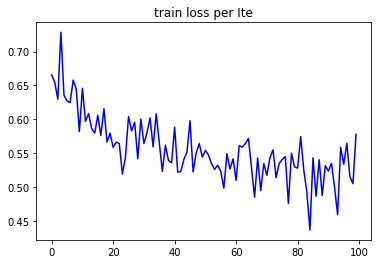

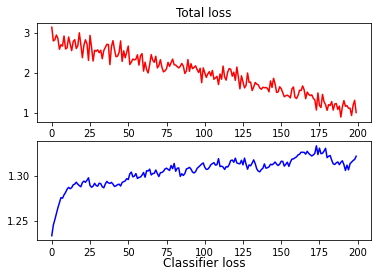

0
Check:
batch_x.shape: torch.Size([1500, 15])
batch_y.shape: torch.Size([1500])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
0 0.7220801115036011
1 0.625134289264679
2 0.6737303733825684
3 0.5959548950195312
4 0.6116093397140503
5 0.5372174382209778
6 0.6425593495368958
7 0.5688404440879822
8 0.5598188638687134
9 0.5866754651069641
10 0.6268005967140198
11 0.5595723986625671
12 0.6066014170646667
13 0.6336768865585327
14 0.612269937992096
15 0.5852745175361633
16 0.5639955401420593
17 0.540581464767456
18 0.5660750269889832
19 0.5122227668762207
20 0.5714343786239624
21 0.5683761835098267
22 0.5469205379486084
23 0.525291919708252
24 0.5645229816436768
25 0.5258275270462036
26 0.4916822016239166
27 0.5215562582015991
28 0.5117197036743164
29 0.4585261642932892
30 0.528219997882843
31 0.5266441702842712
32 0.526132345199585
33 0.600626528263092
34 0.48509377241134644
35 0.4736476242542267
36 0.5037593245506287
37 0.5076239109039307
38 0.5466373562812805
39 0.51478403806686

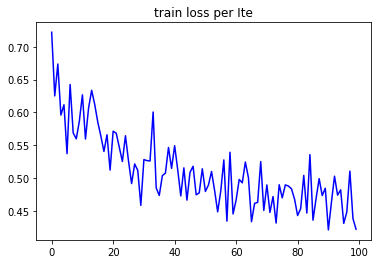

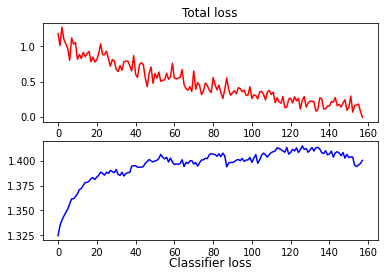

0
Check:
batch_x.shape: torch.Size([1500, 15])
batch_y.shape: torch.Size([1500])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
0 0.5299323201179504
1 0.5285465121269226
2 0.563236653804779
3 0.49629509449005127
4 0.5000960826873779
5 0.5169632434844971
6 0.5185559391975403
7 0.5327420234680176
8 0.4650164246559143
9 0.49809643626213074
10 0.5037893652915955
11 0.465488076210022
12 0.5068924427032471
13 0.468776673078537
14 0.45794677734375
15 0.5335694551467896
16 0.517234206199646
17 0.45223239064216614
18 0.47800377011299133
19 0.41777873039245605
20 0.45264607667922974
21 0.5703887343406677
22 0.503117561340332
23 0.4670741856098175
24 0.48638445138931274
25 0.4723149538040161
26 0.5569022297859192
27 0.4694773554801941
28 0.4646880328655243
29 0.47871559858322144
30 0.4768361747264862
31 0.46579235792160034
32 0.46374401450157166
33 0.42877131700515747
34 0.478606641292572
35 0.5134102702140808
36 0.4667152464389801
37 0.47582682967185974
38 0.4641938805580139
39 0.4248

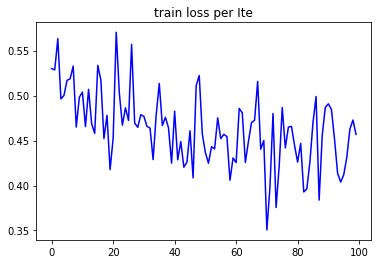

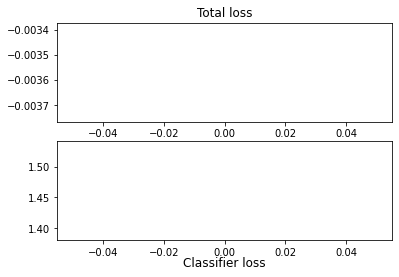

0
Check:
batch_x.shape: torch.Size([1500, 15])
batch_y.shape: torch.Size([1500])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
0 0.4144899249076843
1 0.40271687507629395
2 0.5126675367355347
3 0.43161869049072266
4 0.48097550868988037
5 0.46281567215919495
6 0.43387576937675476
7 0.40050584077835083
8 0.4556664824485779
9 0.4497189223766327
10 0.485383003950119
11 0.375667929649353
12 0.46948525309562683
13 0.4620783030986786
14 0.4623382091522217
15 0.41660064458847046
16 0.5041321516036987
17 0.4510989487171173
18 0.4175957143306732
19 0.46677812933921814
20 0.48302122950553894
21 0.41476672887802124
22 0.4710463285446167
23 0.46901366114616394
24 0.4256681203842163
25 0.4397040009498596
26 0.44046881794929504
27 0.45431119203567505
28 0.4619329869747162
29 0.4393051862716675
30 0.3635919392108917
31 0.4500647187232971
32 0.3900265395641327
33 0.35278505086898804
34 0.4750259518623352
35 0.3907788097858429
36 0.41744205355644226
37 0.4052831828594208
38 0.4413666725158691

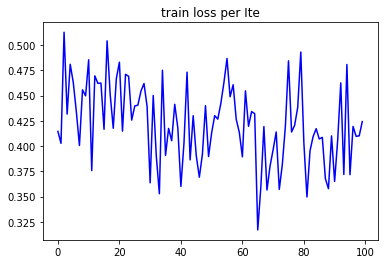

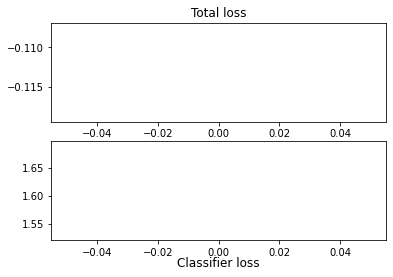

0
Check:
batch_x.shape: torch.Size([1500, 15])
batch_y.shape: torch.Size([1500])
batch_x.dtype: torch.float32
batch_y.dtype: torch.float32
0 0.45059970021247864
1 0.41829976439476013
2 0.5136117339134216
3 0.3979424238204956
4 0.43046900629997253
5 0.4567856788635254
6 0.4196121096611023
7 0.4619084298610687
8 0.4372008740901947
9 0.4015445113182068
10 0.39283889532089233
11 0.4156739115715027
12 0.37455296516418457
13 0.44958359003067017
14 0.4807775318622589
15 0.4329434633255005
16 0.4579867720603943
17 0.4535659849643707
18 0.3703325688838959
19 0.4355015158653259
20 0.4004087448120117
21 0.46406418085098267
22 0.3792564272880554
23 0.3174927830696106
24 0.3719564378261566
25 0.37629005312919617
26 0.39052823185920715
27 0.4769538342952728
28 0.3757142126560211
29 0.43403586745262146
30 0.46861758828163147
31 0.35541173815727234
32 0.4147677421569824
33 0.38695260882377625
34 0.3736884295940399
35 0.4498249590396881
36 0.4184436798095703
37 0.41845443844795227
38 0.4176492094993591

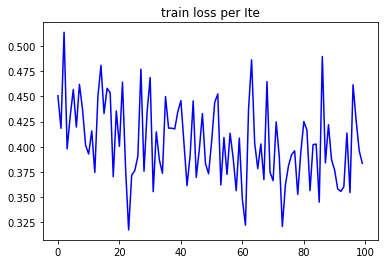

-0.1131277084350586 /home/xychen/Carrior Mobility/MLP_MODELS/model_T2_layers_hidden5_e-1024_224_224_170_170_104.pt


In [16]:
#train
loss_best = []
model_best = []
#Initialize mlp model
neuron_number_layers = [224,224,170,170,104,104,46,46,15,15]
initialized_mlp = initialize_mlp(neuron_number_layers,train_loader_s,0.0001,'r')
mlp = torch.load(initialized_mlp)
#train_mlp(mlp,train_loader_s, 100,0.0001,'r',1)
print(initialized_mlp,len(trainX_s),len(testX_s))
h1_s = np.concatenate((mlp.hidden1(torch.from_numpy(np.array(trainX_s).astype(np.float32))).detach().numpy(), mlp.hidden1(torch.from_numpy(np.array(testX_s).astype(np.float32))).detach().numpy()),axis=0)
h1_t = np.concatenate((mlp.hidden1(torch.from_numpy(np.array(trainX_a).astype(np.float32))).detach().numpy(), mlp.hidden1(torch.from_numpy(np.array(testX_a).astype(np.float32))).detach().numpy()),axis=0)
h2_s = mlp.hidden2(torch.from_numpy(h1_s.astype(np.float32))).detach().numpy()
h2_t = mlp.hidden2(torch.from_numpy(h1_t.astype(np.float32))).detach().numpy()
h3_s = mlp.hidden3(torch.from_numpy(h2_s.astype(np.float32))).detach().numpy()
h3_t = mlp.hidden3(torch.from_numpy(h2_t.astype(np.float32))).detach().numpy()
h4_s = mlp.hidden4(torch.from_numpy(h3_s.astype(np.float32))).detach().numpy()
h4_t = mlp.hidden4(torch.from_numpy(h3_t.astype(np.float32))).detach().numpy()
h5_s = mlp.hidden5(torch.from_numpy(h4_s.astype(np.float32))).detach().numpy()
h5_t = mlp.hidden5(torch.from_numpy(h4_t.astype(np.float32))).detach().numpy()
h6_s = mlp.hidden6(torch.from_numpy(h5_s.astype(np.float32))).detach().numpy()
h6_t = mlp.hidden6(torch.from_numpy(h5_t.astype(np.float32))).detach().numpy()
h7_s = mlp.hidden7(torch.from_numpy(h6_s.astype(np.float32))).detach().numpy()
h7_t = mlp.hidden7(torch.from_numpy(h6_t.astype(np.float32))).detach().numpy()
h8_s = mlp.hidden8(torch.from_numpy(h7_s.astype(np.float32))).detach().numpy()
h8_t = mlp.hidden8(torch.from_numpy(h7_t.astype(np.float32))).detach().numpy()
h9_s = mlp.hidden9(torch.from_numpy(h8_s.astype(np.float32))).detach().numpy()
h9_t = mlp.hidden9(torch.from_numpy(h8_t.astype(np.float32))).detach().numpy()
hidden_s = mlp.hidden10(torch.from_numpy(h9_s.astype(np.float32))).detach().numpy()
hidden_t = mlp.hidden10(torch.from_numpy(h9_t.astype(np.float32))).detach().numpy()
#hidden_s = h8_s
#hidden_t = h8_t
dataX_classifier = np.concatenate((hidden_s,hidden_t),axis=0).tolist()
dataY_classifier = [0 for _ in range(len(hidden_s))]
dataY_classifier.extend([1 for _ in range(len(hidden_t))])
train_loader_c, trainX_c, testX_c, trainY_c, testY_c = batch_loader(dataX_classifier,dataY_classifier,3000)
initialized_mlp_c = initialize_mlp_C(len(dataX_classifier[0]),neuron_number_layers,train_loader_c,1e-3,'c')
mlp_c = torch.load(initialized_mlp_c)

#Adversarial training
loss = []
model = []
for i in range(5):
    loss_all = joint_train_mlp(mlp,train_loader_s,mlp_c,200)
    loss.append(loss_all)
    h1_s = np.concatenate((mlp.hidden1(torch.from_numpy(np.array(trainX_s).astype(np.float32))).detach().numpy(), mlp.hidden1(torch.from_numpy(np.array(testX_s).astype(np.float32))).detach().numpy()),axis=0)
    h1_t = np.concatenate((mlp.hidden1(torch.from_numpy(np.array(trainX_a).astype(np.float32))).detach().numpy(), mlp.hidden1(torch.from_numpy(np.array(testX_a).astype(np.float32))).detach().numpy()),axis=0)
    h2_s = mlp.hidden2(torch.from_numpy(h1_s.astype(np.float32))).detach().numpy()
    h2_t = mlp.hidden2(torch.from_numpy(h1_t.astype(np.float32))).detach().numpy()
    h3_s = mlp.hidden3(torch.from_numpy(h2_s.astype(np.float32))).detach().numpy()
    h3_t = mlp.hidden3(torch.from_numpy(h2_t.astype(np.float32))).detach().numpy()
    h4_s = mlp.hidden4(torch.from_numpy(h3_s.astype(np.float32))).detach().numpy()
    h4_t = mlp.hidden4(torch.from_numpy(h3_t.astype(np.float32))).detach().numpy()
    h5_s = mlp.hidden5(torch.from_numpy(h4_s.astype(np.float32))).detach().numpy()
    h5_t = mlp.hidden5(torch.from_numpy(h4_t.astype(np.float32))).detach().numpy()
    h6_s = mlp.hidden6(torch.from_numpy(h5_s.astype(np.float32))).detach().numpy()
    h6_t = mlp.hidden6(torch.from_numpy(h5_t.astype(np.float32))).detach().numpy()
    h7_s = mlp.hidden7(torch.from_numpy(h6_s.astype(np.float32))).detach().numpy()
    h7_t = mlp.hidden7(torch.from_numpy(h6_t.astype(np.float32))).detach().numpy()
    h8_s = mlp.hidden8(torch.from_numpy(h7_s.astype(np.float32))).detach().numpy()
    h8_t = mlp.hidden8(torch.from_numpy(h7_t.astype(np.float32))).detach().numpy()
    h9_s = mlp.hidden9(torch.from_numpy(h8_s.astype(np.float32))).detach().numpy()
    h9_t = mlp.hidden9(torch.from_numpy(h8_t.astype(np.float32))).detach().numpy()
    hidden_s = mlp.hidden10(torch.from_numpy(h9_s.astype(np.float32))).detach().numpy()
    hidden_t = mlp.hidden10(torch.from_numpy(h9_t.astype(np.float32))).detach().numpy()
    #hidden_s = h8_s
    #hidden_t = h8_t
    dataX_classifier = np.concatenate((hidden_s,hidden_t),axis=0).tolist()
    dataY_classifier = [0 for _ in range(len(hidden_s))]
    dataY_classifier.extend([1 for _ in range(len(hidden_t))])
    train_loader_c, trainX_c, testX_c, trainY_c, testY_c = batch_loader(dataX_classifier,dataY_classifier,1500)
    train_mlp(mlp_c,train_loader_c, 100,0.0001,'c',1)
    model_save_path_final = '/home/xychen/Carrior Mobility/MLP_MODELS/model_T2_layers_hidden5_e-102'+str(i)+'_'+str(neuron_number_layers[0])+'_'+str(neuron_number_layers[1])+'_'+str(neuron_number_layers[2])+'_'+str(neuron_number_layers[3])+'_'+str(neuron_number_layers[4])+'.pt'
    model.append(model_save_path_final)
    torch.save(mlp, model_save_path_final)
loss_best.append(min(loss))
model_best.append(model[loss.index(min(loss))])
print(min(loss),model[loss.index(min(loss))])